# Age Recognition Model Notebook using RESNET50

In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras import models
from keras.applications.resnet import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D

In [9]:
# Consts
images = []
ages = []
# Please provide your own image path to the dataface with faces.
path = "../../Dataset/Age Recognition/UTKFace"

### Functions

In [4]:
# function to process images before training
def preprocessing(given_img):
    given_img = given_img / 255  # normalizing image.
    given_img = cv2.resize(given_img, (64, 64))  # resizing it.
    return given_img

In [5]:
## function to create the model
def create_model(input_shape):
    tf.keras.backend.clear_session() # clear session before creating model
    input_layer = Input(shape=input_shape, name='my_input')
    base_model = tf.keras.applications.ResNet50(
        include_top=False, weights='imagenet', input_tensor=input_layer
    )
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='linear')(x)
    model = models.Model(inputs=input_layer, outputs=predictions)
    return model

## Training the model

In [10]:
# Loading data
for image in os.listdir(path):
    img = cv2.imread(path + "/" + image)
    images.append(img)
    ages.append(float(image.split("_")[0]))
X_train, X_valid, y_train, y_valid = train_test_split(images, ages, test_size=0.33, random_state=42)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

X_train = np.array([preprocessing(x) for x in X_train]).reshape(len(X_train), 64, 64, 3)
X_valid = np.array([preprocessing(x) for x in X_valid]).reshape(len(X_valid), 64, 64, 3)

KeyboardInterrupt: 

In [7]:
# Creating the model and compile it
input_shape = (64, 64, 3)
model = create_model(input_shape)
model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [9]:
# Fitting the model
## history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid), callbacks=[stop])
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_valid, y_valid))

497/497 [==============================] - 133s 263ms/step - loss: 365.6764 - mean_squared_error: 365.6764 - val_loss: 328.7113 - val_mean_squared_error: 328.7113


In [10]:
# Saving the model
model.save("./resnet-64.h5")

KeyError: 'my_input_ib-0'

## Evaluation

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, valid_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy (mean squared error)
train_acc = history.history['mean_squared_error']
valid_acc = history.history['val_mean_squared_error']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'bo', label='Training MSE')
plt.plot(epochs, valid_acc, 'b', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


245/245 [==============================] - 33s 136ms/step - loss: 209.7413 - mean_squared_error: 209.7413
Test loss: 209.74131774902344
Test accuracy: 209.74131774902344


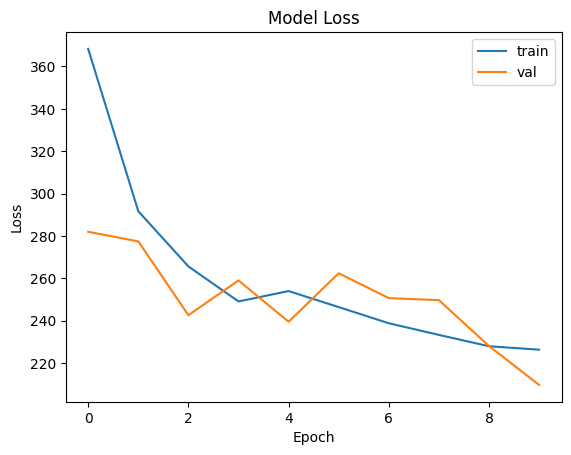

KeyError: 'accuracy'

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_valid, y_valid)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Plot the training and validation loss/accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


In [31]:
# loading the model 
model = tf.keras.models.load_model("./resnet.h5")

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 my_input (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['my_input[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
# Try to predict with an image
img = cv2.imread('C:\\Users\\mrsal\\OneDrive\\Desktop\\jhj\\1.jpg')
processed_img = preprocessing(img)
processed_img = processed_img.reshape(1, 64, 64, 3)
predicted_age = model.predict(processed_img)[0]


In [ ]:
predicted_age